In [240]:
%pip install scikit-learn 

Note: you may need to restart the kernel to use updated packages.


In [241]:
import pandas as pd
import matplotlib.pyplot as plt



In [242]:
df=pd.read_csv('311 Response Data (2018-2023).csv')

In [243]:
df.drop('Unnamed: 0',axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   RowID              12000 non-null  int64  
 1   SRRecordID         12000 non-null  object 
 2   ServiceRequestNum  12000 non-null  object 
 3   SRType             12000 non-null  object 
 4   MethodReceived     12000 non-null  object 
 5   CreatedDate        12000 non-null  int64  
 6   SRStatus           12000 non-null  object 
 7   StatusDate         12000 non-null  int64  
 8   DueDate            11990 non-null  float64
 9   CloseDate          11468 non-null  float64
 10  Agency             11975 non-null  object 
 11  LastActivity       8034 non-null   object 
 12  LastActivityDate   7016 non-null   float64
 13  Outcome            6245 non-null   object 
 14  Address            8263 non-null   object 
 15  ZipCode            8221 non-null   object 
 16  Neighborhood       808

In [345]:
df['StatusDate'] = pd.to_datetime(df['StatusDate'], unit='ms')
df['DueDate'] = pd.to_datetime(df['DueDate'], unit='ms')
df['CloseDate'] = pd.to_datetime(df['CloseDate'], unit='ms')
df['LastActivityDate'] = pd.to_datetime(df['LastActivityDate'], unit='ms')
df['CreatedDate'] = pd.to_datetime(df['CreatedDate'], unit='ms')


In [346]:
df['GeoLocation'].value_counts()
df['ReqLengthOpen'] = df['CloseDate'] - df['CreatedDate']


In [347]:
# Convert timedelta to number of days
days_open = df['ReqLengthOpen'].dt.days

Q1 = days_open.quantile(0.25) 
Q3 = days_open.quantile(0.75)

IQR = Q3-Q1

lower_bound = Q1-(1.5*IQR)
upper_bound = Q3+(1.5*IQR)

outliers =  days_open[ (days_open< lower_bound) | (days_open> upper_bound)]
outliers.shape

# outliers  = [x for x in days_open if x<lower_bound or x> upper_bound ]



(2162,)

In [348]:
print(f'Lower Bound: {lower_bound}')
print(f'Upper Bound: {upper_bound}')

Lower Bound: -3.0
Upper Bound: 5.0


In [349]:
outliers.describe()

count    2162.000000
mean       69.224792
std       135.537163
min      -324.000000
25%        10.000000
50%        23.000000
75%        57.000000
max      1761.000000
Name: ReqLengthOpen, dtype: float64

In [350]:
no_outliers = days_open[(days_open>=lower_bound) & (days_open <= upper_bound)]
print(len(no_outliers))

9306


In [351]:
test_full=days_open.dropna()

In [352]:
print(len(no_outliers)+len(outliers))
print(len(days_open.dropna()))

11468
11468


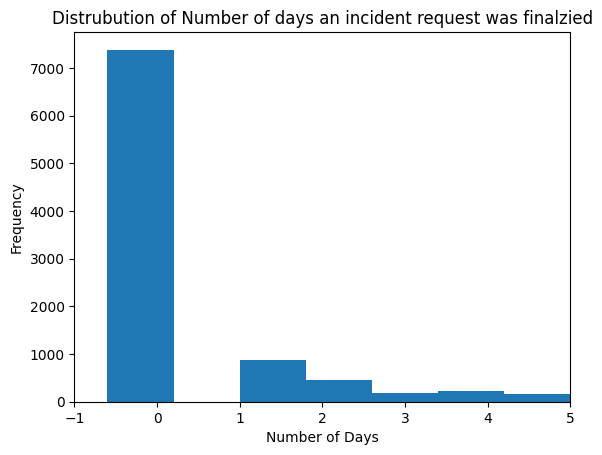

In [353]:
no_outliers.plot.hist(bins=10)
plt.title("Distrubution of Number of days an incident request was finalzied")
plt.ylabel("Frequency")
plt.xlabel("Number of Days")
plt.xlim(-1,upper_bound)
plt.show()

In [354]:
features= df[['SRType','MethodReceived','CreatedDate','SRStatus','StatusDate','Outcome','Address','ZipCode','Neighborhood','CouncilDistrict', 'PoliceDistrict',
       'PolicePost', 'Latitude', 'Longitude', 'GeoLocation']]

In [355]:
target_0=no_outliers[no_outliers<=3]
tagret_1=no_outliers[no_outliers>3]

In [356]:
print(f'Number of Incidents that were adressed withing 3 day goal : {len(target_0)}')
print(f'Number of Incidents that were adressed after 3 day goal : {len(tagret_1)}')


Number of Incidents that were adressed withing 3 day goal : 8918
Number of Incidents that were adressed after 3 day goal : 388


In [357]:
df['ReqLengthOpen'] = df['ReqLengthOpen'].dt.days


In [358]:

df['Target'] = (df['ReqLengthOpen']<=3).astype(int) 
df['ReqLengthOpen'].value_counts()

ReqLengthOpen
0.0      7380
1.0       877
2.0       462
4.0       223
3.0       192
         ... 
217.0       1
143.0       1
249.0       1
118.0       1
46.0        1
Name: count, Length: 254, dtype: int64

In [359]:
df['Target'].value_counts()

Target
1    8921
0    3079
Name: count, dtype: int64

In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   RowID              12000 non-null  int64         
 1   SRRecordID         12000 non-null  object        
 2   ServiceRequestNum  12000 non-null  object        
 3   SRType             12000 non-null  object        
 4   MethodReceived     12000 non-null  object        
 5   CreatedDate        12000 non-null  datetime64[ns]
 6   SRStatus           12000 non-null  object        
 7   StatusDate         12000 non-null  datetime64[ns]
 8   DueDate            11990 non-null  datetime64[ns]
 9   CloseDate          11468 non-null  datetime64[ns]
 10  Agency             11975 non-null  object        
 11  LastActivity       8034 non-null   object        
 12  LastActivityDate   7016 non-null   datetime64[ns]
 13  Outcome            6245 non-null   object        
 14  Addres

In [360]:
test=pd.to_datetime(df['StatusDate'],unit="D")
test

0       2018-11-19 13:25:24
1       2018-11-19 15:01:04
2       2018-11-18 11:40:46
3       2019-06-28 10:03:00
4       2018-11-18 10:55:40
                ...        
11995   2023-01-02 14:23:33
11996   2023-01-02 13:20:55
11997   2023-01-02 13:22:34
11998   2023-01-02 22:49:57
11999   2023-01-02 13:26:04
Name: StatusDate, Length: 12000, dtype: datetime64[ns]

In [261]:
df.columns

Index(['RowID', 'SRRecordID', 'ServiceRequestNum', 'SRType', 'MethodReceived',
       'CreatedDate', 'SRStatus', 'StatusDate', 'DueDate', 'CloseDate',
       'Agency', 'LastActivity', 'LastActivityDate', 'Outcome', 'Address',
       'ZipCode', 'Neighborhood', 'CouncilDistrict', 'PoliceDistrict',
       'PolicePost', 'Latitude', 'Longitude', 'GeoLocation', 'ReqLengthOpen',
       'Target'],
      dtype='object')

### Mainly removed dates because we calculated our target using a requests closed date - its open date and other requent identifiers like SRRecordID

In [270]:
to_drop=['SRRecordID','ServiceRequestNum','CreatedDate','StatusDate','DueDate','CloseDate','GeoLocation','ReqLengthOpen','LastActivityDate'  ]

In [273]:
df['CouncilDistrict'].value_counts()

CouncilDistrict
9.0     769
1.0     760
13.0    748
12.0    730
11.0    684
3.0     570
10.0    527
8.0     525
7.0     525
14.0    513
6.0     469
4.0     452
2.0     445
5.0     372
Name: count, dtype: int64

In [361]:
df2 = df.drop(columns=to_drop)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowID            12000 non-null  int64  
 1   SRType           12000 non-null  object 
 2   MethodReceived   12000 non-null  object 
 3   SRStatus         12000 non-null  object 
 4   Agency           11975 non-null  object 
 5   LastActivity     8034 non-null   object 
 6   Outcome          6245 non-null   object 
 7   Address          8263 non-null   object 
 8   ZipCode          8221 non-null   object 
 9   Neighborhood     8086 non-null   object 
 10  CouncilDistrict  8089 non-null   float64
 11  PoliceDistrict   8089 non-null   object 
 12  PolicePost       2558 non-null   object 
 13  Latitude         8263 non-null   float64
 14  Longitude        8263 non-null   float64
 15  Target           12000 non-null  int64  
dtypes: float64(3), int64(2), object(11)
memory usage: 1.5+ MB


In [362]:
df2.columns 

Index(['RowID', 'SRType', 'MethodReceived', 'SRStatus', 'Agency',
       'LastActivity', 'Outcome', 'Address', 'ZipCode', 'Neighborhood',
       'CouncilDistrict', 'PoliceDistrict', 'PolicePost', 'Latitude',
       'Longitude', 'Target'],
      dtype='object')

In [363]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import OneHotEncoder

In [364]:
# Start fresh - complete code
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Get categorical columns
categorical_columns = df2.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:", categorical_columns)
print("Shape of categorical data:", df2[categorical_columns].shape)

# Check for any issues with the categorical data
print("Sample of categorical data:")
print(df2[categorical_columns].head())

# Initialize encoder
encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')

# Fit and transform
print("Fitting encoder...")
encoded_categoricals = encoder.fit_transform(df2[categorical_columns])
print("Actual encoded shape:", encoded_categoricals.shape)

# Only get feature names if encoding worked correctly
if encoded_categoricals.shape[1] > 1:
    feature_names = encoder.get_feature_names_out(categorical_columns)
    print("Number of feature names:", len(feature_names))
    
    # Create DataFrame
    df_encoded_cat = pd.DataFrame(encoded_categoricals, 
                                  columns=feature_names, 
                                  index=df2.index)
else:
    print("ERROR: Encoding resulted in only 1 column!")
    print("This suggests an issue with the categorical data or encoder settings.")

Categorical columns: ['SRType', 'MethodReceived', 'SRStatus', 'Agency', 'LastActivity', 'Outcome', 'Address', 'ZipCode', 'Neighborhood', 'PoliceDistrict', 'PolicePost']
Shape of categorical data: (12000, 11)
Sample of categorical data:
                                 SRType MethodReceived SRStatus  \
0                       SW-Mixed Refuse            API   Closed   
1              HCD-Zoning Investigation            API   Closed   
2            TRT-Traffic Signal Repairs          Phone   Closed   
3  HCD-Illegal Signs on Public Property            API   Closed   
4                     SW-Bulk Scheduled          Phone   Closed   

                                              Agency      LastActivity  \
0  Solid Waste                                   ...  Service Response   
1  Housing                                       ...  Service Response   
2  Transportation                                ...  Service Response   
3  Housing                                       ...  Service Res

In [365]:
# Get numerical columns (excluding categorical ones)
numerical_columns = ['RowID', 'CouncilDistrict', 'Latitude', 'Longitude']

# Add Target column if you want to keep it for supervised learning
if 'Target' in df2.columns:
    numerical_columns.append('Target')

# Combine numerical and encoded categorical columns
df_final = pd.concat([df2[numerical_columns], df_encoded_cat], axis=1)

print(f"Final dataset shape: {df_final.shape}")
print(f"Total features: {df_final.shape[1]}")
print("Dataset is ready for machine learning!")

# Quick check
print(f"Numerical columns: {len(numerical_columns)}")
print(f"Encoded categorical columns: {df_encoded_cat.shape[1]}")
print(f"Total: {len(numerical_columns) + df_encoded_cat.shape[1]} = {df_final.shape[1]} ✓")

Final dataset shape: (12000, 8073)
Total features: 8073
Dataset is ready for machine learning!
Numerical columns: 5
Encoded categorical columns: 8068
Total: 8073 = 8073 ✓


In [369]:
df_final.to_csv("final_dataset.csv")

In [371]:
x=df_final.dropna()
print(f'Original Length{len(df)}')
print(f'No nan length {len(x)}')

Original Length12000
No nan length 8089
